In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data_url = "/Users/akankshaankam/Downloads/Prodigy/API_SP.POP.TOTL_DS2_en_csv_v2_5795797/data1.csv"
data = pd.read_csv(data_url, header=0)

In [12]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [31]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Total Population'],
      dtype='object')

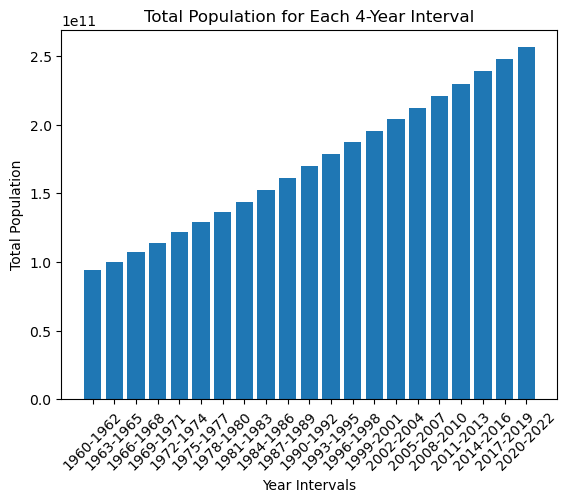

In [39]:
data['Total Population'] = data.iloc[:, 4:].sum(axis=1)

# Create intervals of 4 years
intervals = [(start, start + 2) for start in range(1960, 2023, 3)]

# Calculate total population for each interval
interval_population = []
for interval in intervals:
    start_year, end_year = interval
    end_year = min(end_year, 2022)  # Cap the end year at 2022
    if str(end_year) in data.columns:
        total_pop = data.loc[:, str(start_year):str(end_year)].sum().sum()
        interval_population.append(total_pop)
    else:
        interval_population.append(0)  # Handle missing data for some years

# Create labels for intervals
interval_labels = [f"{interval[0]}-{interval[1]}" for interval in intervals]

# Create a bar plot
plt.bar(interval_labels, interval_population)
plt.xlabel('Year Intervals')
plt.ylabel('Total Population')
plt.title('Total Population for Each 4-Year Interval')
plt.xticks(rotation=45)
plt.show()

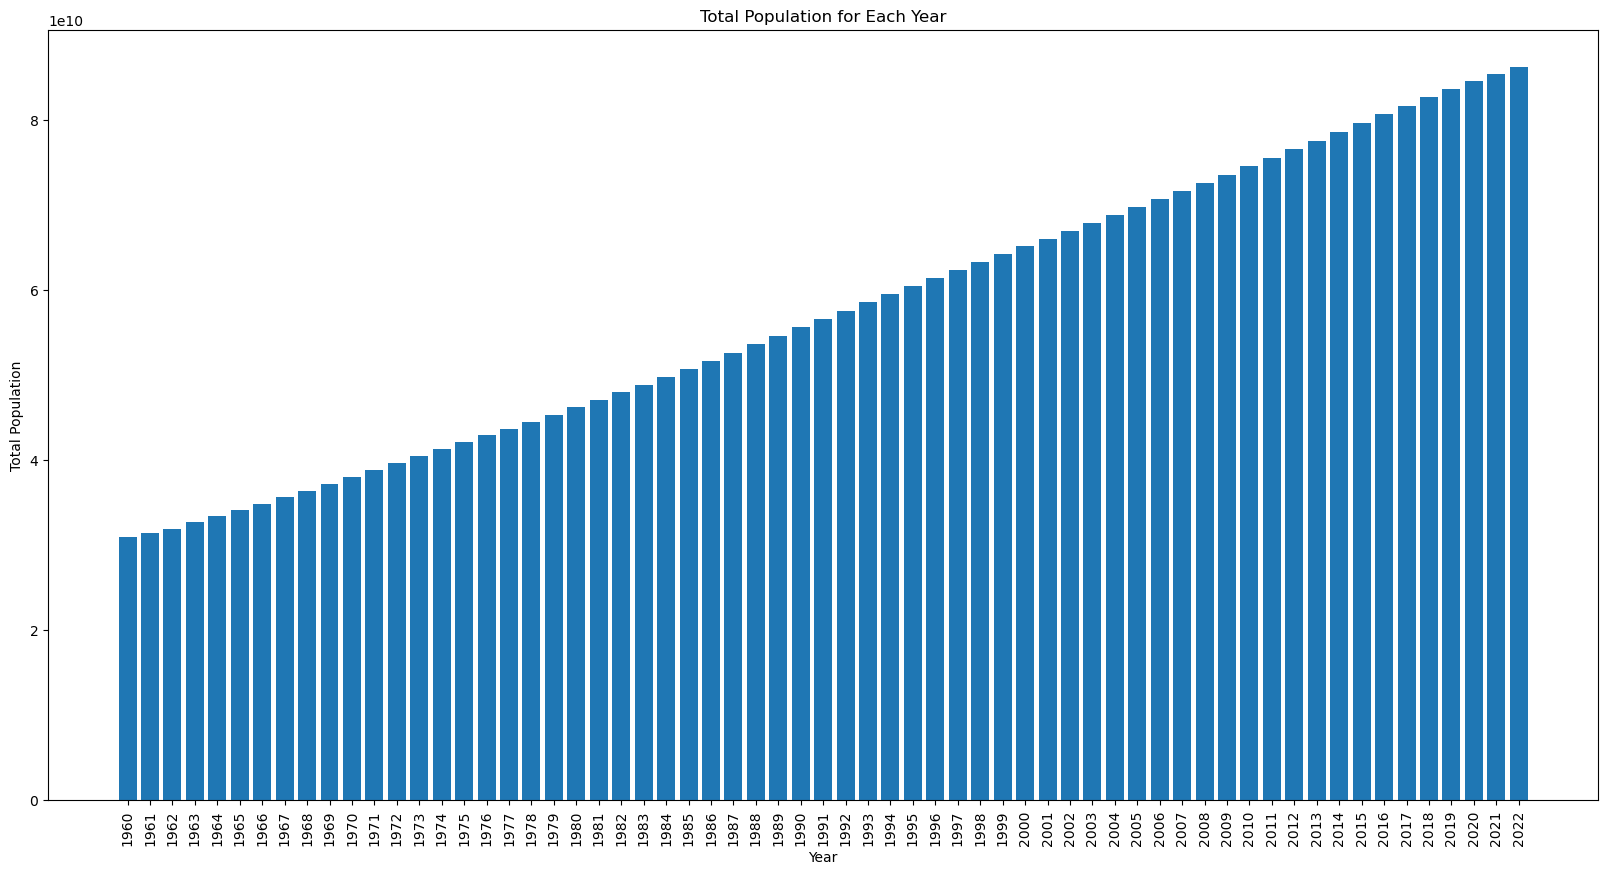

In [43]:
data['Total Population'] = data.iloc[:, 4:].sum(axis=1)

# Extract years and corresponding total population
years = data.columns[4:-1]  # Exclude 'Total Population' and last column
total_population = data.iloc[:, 4:-1].sum(axis=0)

# Increase the size of the figure
plt.figure(figsize=(20, 10))  # Adjust the width and height as needed

# Create a bar plot
plt.bar(years, total_population)
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population for Each Year')
plt.xticks(rotation=90)
plt.show()